In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.shape

(26967, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [10]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [12]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


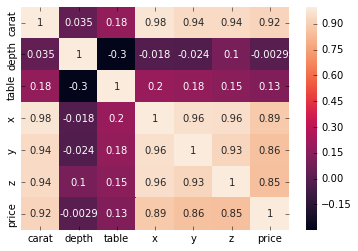

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


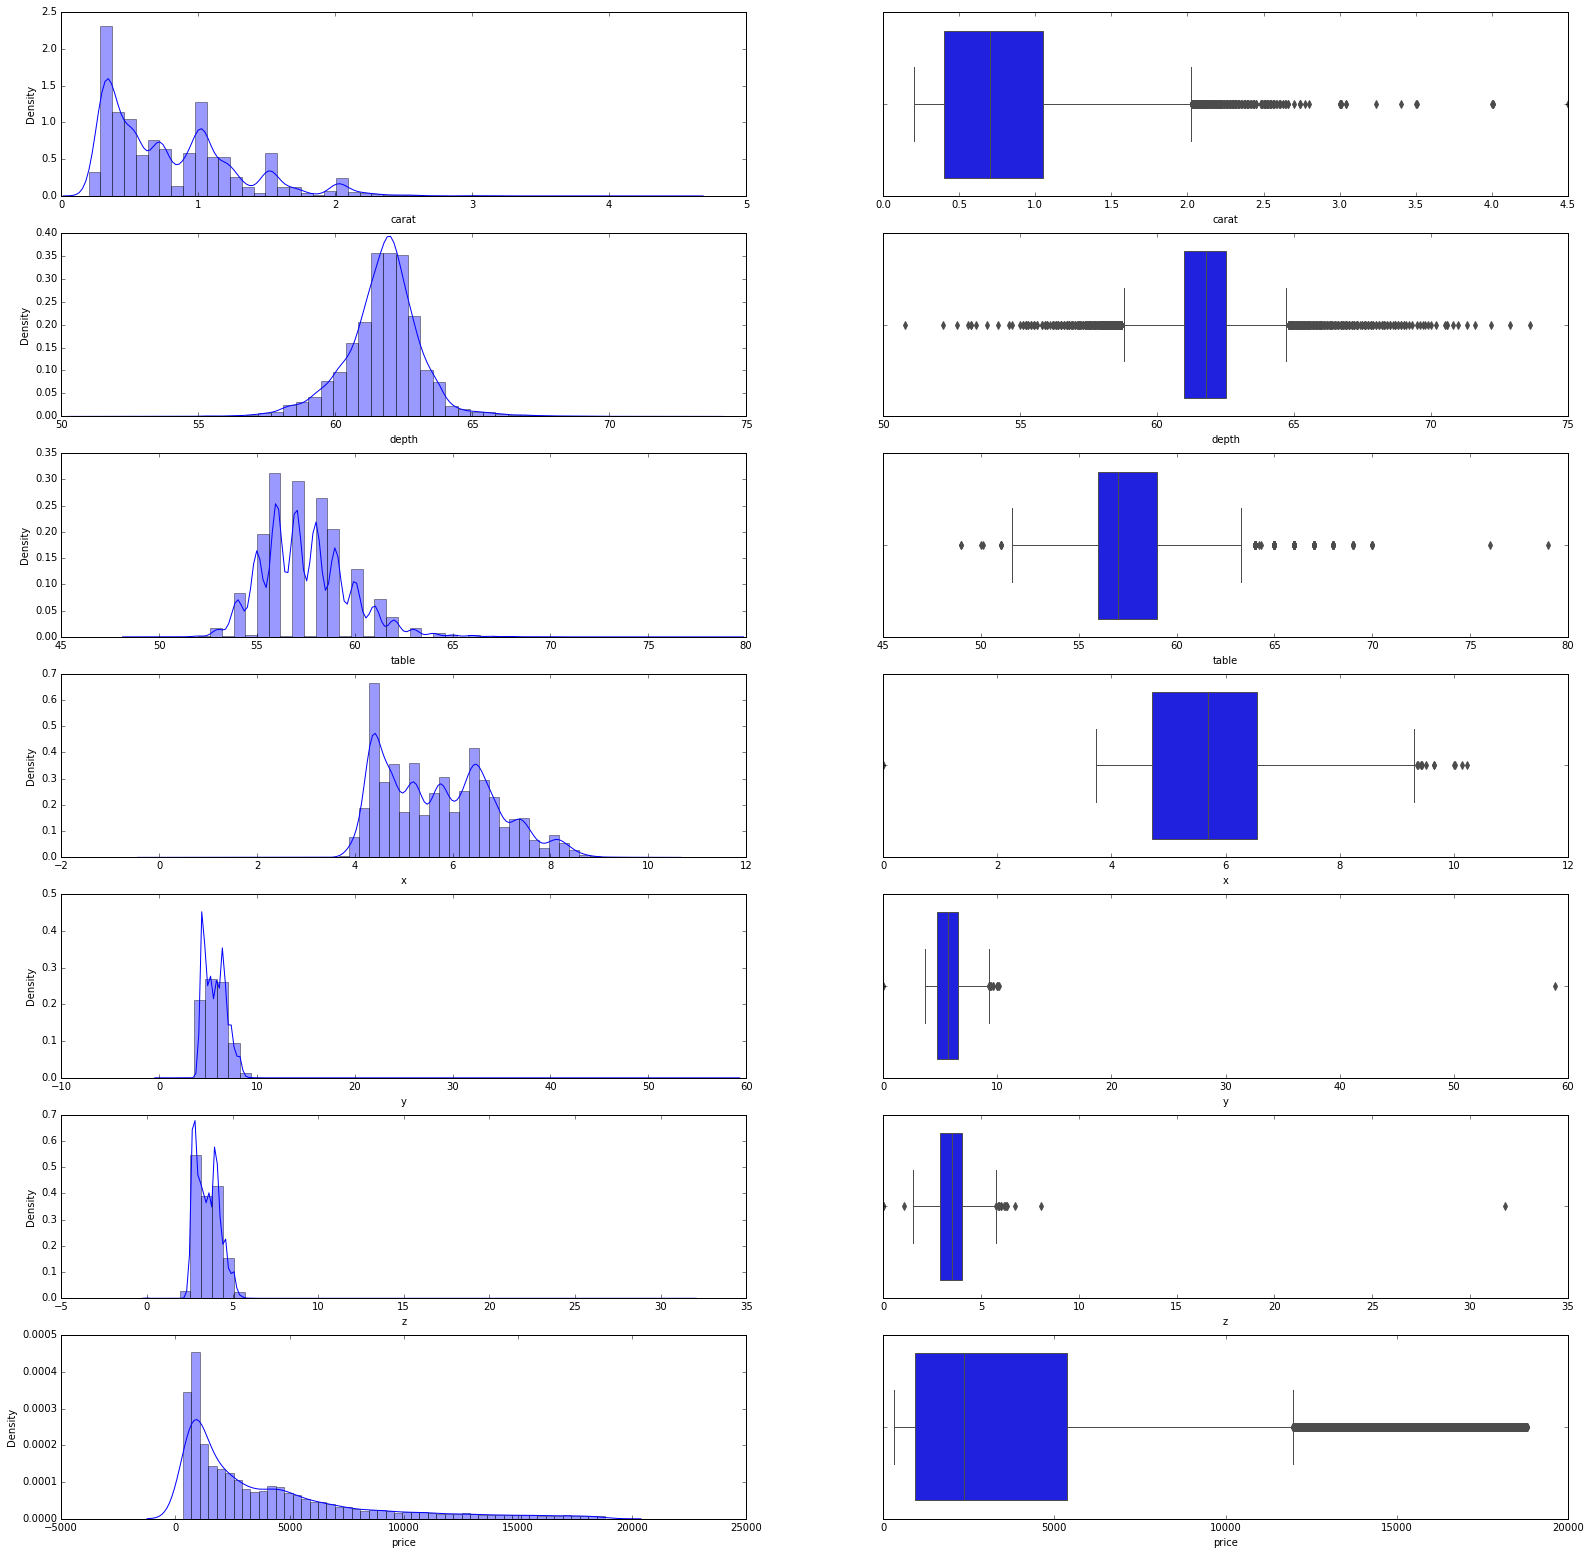

In [17]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(27,27)
sns.distplot(df['carat'], kde=True, ax=axes[0][0])
sns.boxplot(x='carat', data=df, ax=axes[0][1])
sns.distplot(df['depth'] , kde=True, ax=axes[1][0])
sns.boxplot(x='depth', data=df , ax=axes[1][1])
sns.distplot(df['table'], kde=True, ax=axes[2][0])
sns.boxplot(x='table', data=df, ax=axes[2][1])
a=sns.distplot(df['x'] , kde=True, ax=axes[3][0])
sns.boxplot(x='x', data=df , ax=axes[3][1])
sns.distplot(df['y'] , kde=True, ax=axes[4][0])
sns.boxplot(x='y', data=df , ax=axes[4][1])
sns.distplot(df['z'] , kde=True, ax=axes[5][0])
sns.boxplot(x='z', data=df , ax=axes[5][1])
sns.distplot(df['price'] , kde=True, ax=axes[6][0])
sns.boxplot(x='price', data=df , ax=axes[6][1])
plt.show()

In [18]:
df.skew()

carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

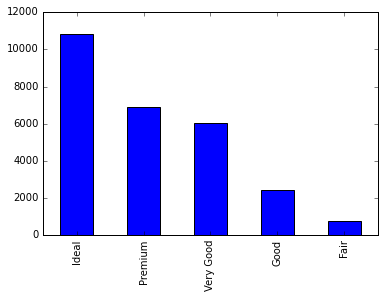

In [19]:
pd.value_counts(df["cut"]).plot(kind="bar")
plt.show()

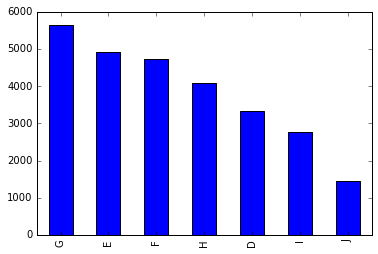

In [20]:
pd.value_counts(df["color"]).plot(kind="bar")
plt.show()

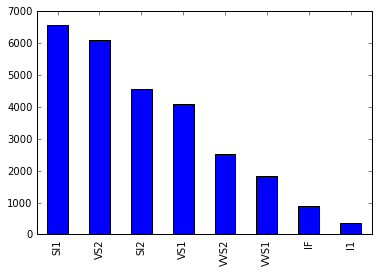

In [21]:
pd.value_counts(df["clarity"]).plot(kind="bar")
plt.show()

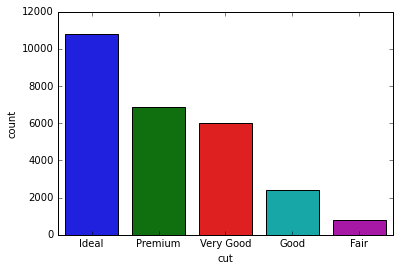

In [22]:
sns.countplot(df['cut']);

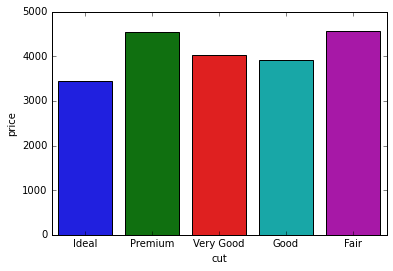

In [23]:
sns.barplot(data = df, x='cut',y='price',ci=0);

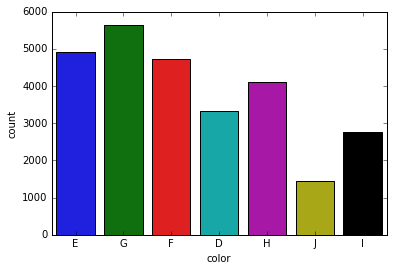

In [24]:
sns.countplot(df['color']);

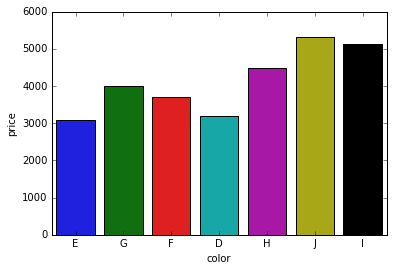

In [25]:
sns.barplot(data = df, x='color',y='price',ci=0);

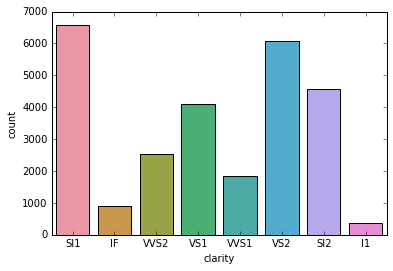

In [26]:
sns.countplot(df['clarity']);

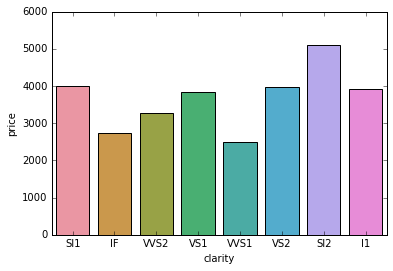

In [27]:
sns.barplot(data = df, x='clarity',y='price',ci=0);

In [28]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,149,94,68
Good,311,490,453,418,351,252,160
Ideal,1409,1966,1891,2463,1550,1073,453
Premium,806,1174,1164,1471,1159,707,405
Very Good,741,1186,1067,1154,886,639,354


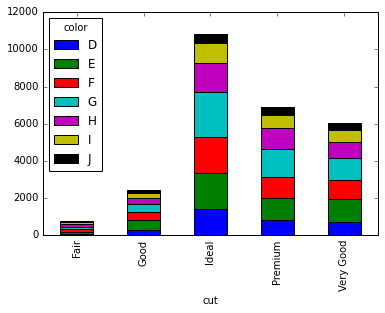

In [29]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True);

In [30]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,224,93,129,10,38
Good,50,30,764,527,330,491,100,143
Ideal,74,610,2146,1324,1781,2527,1036,1307
Premium,108,115,1809,1443,996,1693,307,415
Very Good,43,132,1653,1046,887,1253,386,627


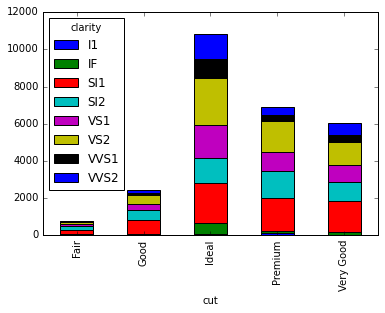

In [31]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True);

<Figure size 1440x1440 with 0 Axes>

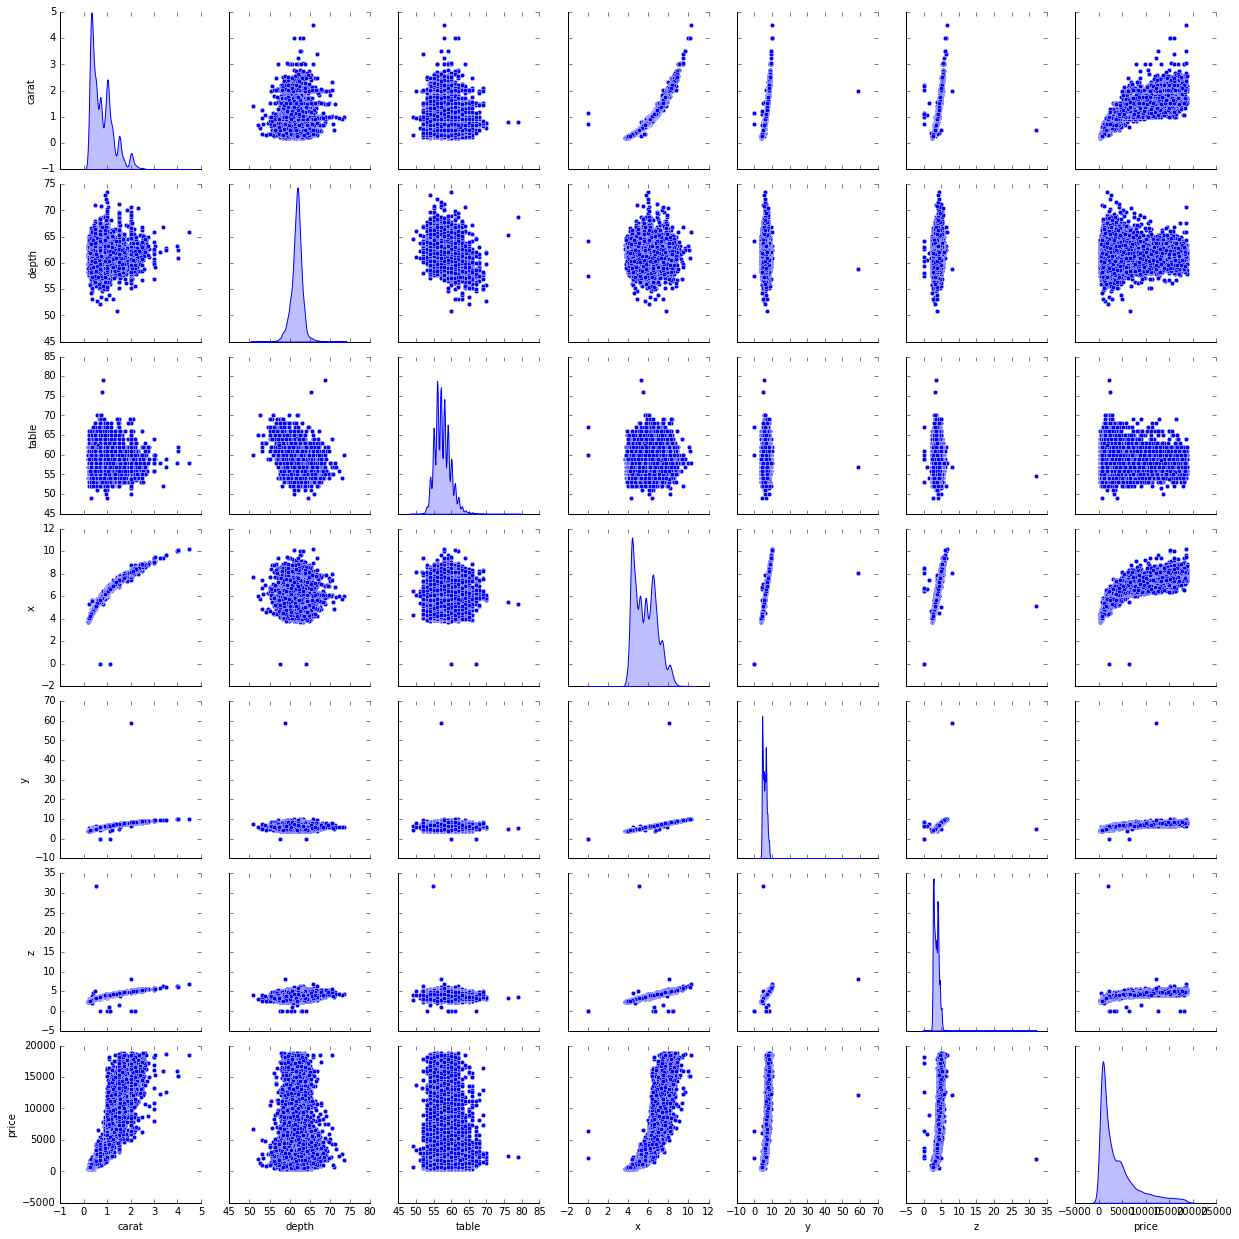

In [32]:
plt.figure(figsize=(20,20))
sns.pairplot(df, diag_kind='kde')  
plt.show()

In [33]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [34]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [35]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,NaN,NaN,NaN,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


In [36]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [37]:
for feature in df[["carat","depth","table","x","y","z","price"]]:     
    lr,ur=remove_outlier(df[feature]) 
    df[feature]=np.where(df[feature]>ur,ur,df[feature])    
    df[feature]=np.where(df[feature]<lr,lr,df[feature]) 

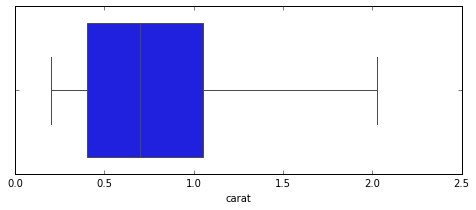

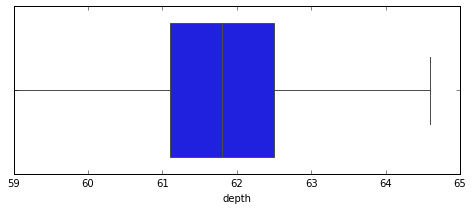

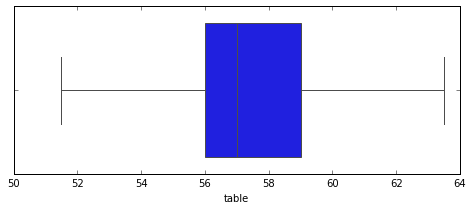

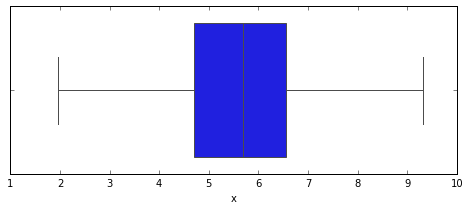

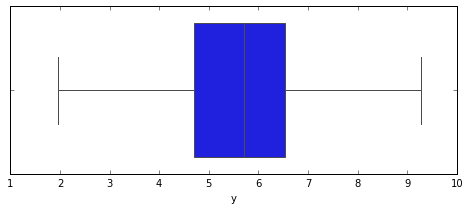

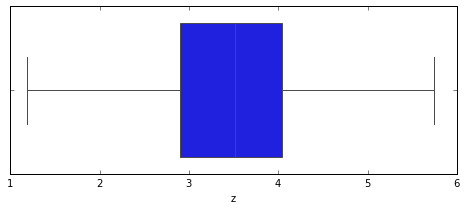

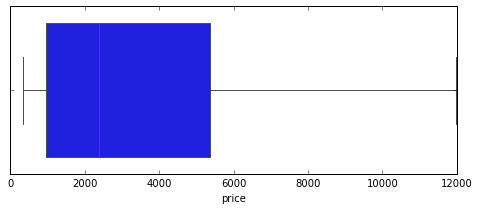

In [38]:
cont=["carat","depth","table","x","y","z","price"];
for i in cont:
    plt.figure(figsize=(8,3))
    sns.boxplot(df[i])
    plt.show()

In [39]:
temp = pd.DataFrame(df.color.str.isdigit())
temp[temp['color'] == False]

,color
0,False
1,False
2,False
3,False
4,False
...,...
26962,False
26963,False
26964,False
26965,False


In [40]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

In [41]:
df = df.replace('?', np.nan)

In [42]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [43]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.793298,NaN,NaN,NaN,61.750462,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,NaN,NaN,NaN,1.218530,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,NaN,NaN,NaN,59.000000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


In [44]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [45]:
df.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [46]:
df['cut']=np.where(df['cut'] =='Very Good', 'Good', df['cut'])
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [47]:
df['color']=np.where(df['color'] =='E', 'D', df['color'])
df['color'].unique()

array(['D', 'G', 'F', 'H', 'J', 'I'], dtype=object)

In [48]:
df['clarity']=np.where(df['clarity'] =='VS2', 'VS1', df['clarity'])
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'SI2', 'I1'], dtype=object)

In [49]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  4
Fair         780
Premium     6886
Good        8462
Ideal      10805
Name: cut, dtype: int64


COLOR :  6
J    1440
I    2765
H    4095
F    4723
G    5653
D    8257
Name: color, dtype: int64


CLARITY :  7
I1        364
IF        891
VVS1     1839
VVS2     2530
SI2      4564
SI1      6565
VS1     10180
Name: clarity, dtype: int64




In [50]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [51]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
df.dtypes

carat           float64
depth           float64
table           float64
x               float64
y               float64
z               float64
price           float64
cut_Good          uint8
cut_Ideal         uint8
cut_Premium       uint8
color_F           uint8
color_G           uint8
color_H           uint8
color_I           uint8
color_J           uint8
clarity_IF        uint8
clarity_SI1       uint8
clarity_SI2       uint8
clarity_VS1       uint8
clarity_VVS1      uint8
clarity_VVS2      uint8
dtype: object

In [53]:
X = df.drop('price', axis=1)
y = df[['price']]

In [54]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [56]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [57]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9137.12583178667
The coefficient for depth is -25.05797603607016
The coefficient for table is -22.91461085335905
The coefficient for x is -1225.5041992019162
The coefficient for y is 849.0742420980613
The coefficient for z is -138.34807346718674
The coefficient for cut_Good is 555.5676726201319
The coefficient for cut_Ideal is 688.5191846924912
The coefficient for cut_Premium is 652.2015771255815
The coefficient for color_F is -141.97922009290775
The coefficient for color_G is -299.9575919347851
The coefficient for color_H is -733.7713892991286
The coefficient for color_I is -1198.2600056166277
The coefficient for color_J is -1800.2704186503454
The coefficient for clarity_IF is 4000.559590927169
The coefficient for clarity_SI1 is 2529.1196872795435
The coefficient for clarity_SI2 is 1694.044402966323
The coefficient for clarity_VS1 is 3166.8680405364535
The coefficient for clarity_VVS1 is 3768.5528599680783
The coefficient for clarity_VVS2 is 3760.361540927

In [58]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1043.4696796230464


In [59]:
regression_model.score(X_train, y_train)

0.9392484114512122

In [60]:
regression_model.score(X_test, y_test)

0.9410599509997208

In [61]:
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

854.2039531963175

In [62]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

843.4000879236213

In [63]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VVS1,clarity_VVS2,price
22114,0.34,62.4,60.0,4.41,4.44,2.76,1,0,0,0,...,1,0,0,0,0,0,1,0,0,537.0
2275,0.30,61.2,55.0,4.35,4.31,2.65,0,1,0,0,...,0,0,0,0,0,0,1,0,0,844.0
19183,0.50,62.5,57.0,5.09,5.05,3.17,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1240.0
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,0,0,1,0,0,0,4065.0
25414,1.02,61.1,62.0,6.54,6.49,3.98,0,0,1,1,...,0,0,0,0,0,1,0,0,0,4057.0


In [64]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Ideal+cut_Premium+cut_Good+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VVS1+clarity_VVS2', data = data_train).fit()
lm1.params

Intercept      -1043.469680
carat           9137.125832
depth            -25.057976
table            -22.914611
x              -1225.504199
y                849.074242
z               -138.348073
cut_Ideal        688.519185
cut_Premium      652.201577
cut_Good         555.567673
color_F         -141.979220
color_G         -299.957592
color_H         -733.771389
color_I        -1198.260006
color_J        -1800.270419
clarity_IF      4000.559591
clarity_SI1     2529.119687
clarity_SI2     1694.044403
clarity_VS1     3166.868041
clarity_VVS1    3768.552860
clarity_VVS2    3760.361541
dtype: float64

In [65]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.456e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:52:49   Log-Likelihood:            -1.5401e+05
No. Observations:               18853   AIC:                         3.081e+05
Df Residuals:                   18832   BIC:                         3.082e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1043.4697    652.909     -1.598   

In [66]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [67]:
np.sqrt(mse)

854.2039531963177

In [68]:
data_test=pd.concat([X_test,y_test],axis=1)
y_pred = lm1.predict(data_test)

In [69]:
mse = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [70]:
import math

math.sqrt(mse)

843.400087923622

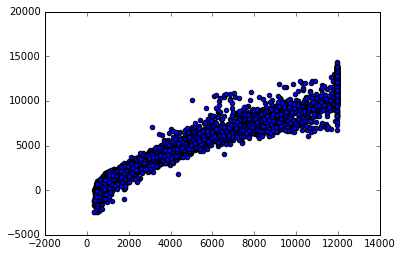

In [71]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [72]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1043.47) * Intercept + (9137.13) * carat + (-25.06) * depth + (-22.91) * table + (-1225.5) * x + (849.07) * y + (-138.35) * z + (688.52) * cut_Ideal + (652.2) * cut_Premium + (555.57) * cut_Good + (-141.98) * color_F + (-299.96) * color_G + (-733.77) * color_H + (-1198.26) * color_I + (-1800.27) * color_J + (4000.56) * clarity_IF + (2529.12) * clarity_SI1 + (1694.04) * clarity_SI2 + (3166.87) * clarity_VS1 + (3768.55) * clarity_VVS1 + (3760.36) * clarity_VVS2 + 

In [73]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [74]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [75]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2130998271540685
The coefficient for depth is -0.008750776210541489
The coefficient for table is -0.01423959182083951
The coefficient for x is -0.39680615087643617
The coefficient for y is 0.2730186977455839
The coefficient for z is -0.027716415013962756
The coefficient for cut_Good is 0.07438147021532386
The coefficient for cut_Ideal is 0.0973449906285871
The coefficient for cut_Premium is 0.08235063628827256
The coefficient for color_F is -0.015447728308790497
The coefficient for color_G is -0.03540878562179683
The coefficient for color_H is -0.07598580252812126
The coefficient for color_I is -0.10507468373477108
The coefficient for color_J is -0.1160903928752591
The coefficient for clarity_IF is 0.2047388091313804
The coefficient for clarity_SI1 is 0.31322038526483265
The coefficient for clarity_SI2 is 0.18381840368851263
The coefficient for clarity_VS1 is 0.44265061524101756
The coefficient for clarity_VVS1 is 0.27660006971311485
The coefficient for c

In [76]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.0151153284834534e-16


In [77]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9409074673512623

In [78]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [79]:
math.sqrt(mse)

0.2430895568483716

In [80]:
y_pred = regression_model.predict(X_test_scaled)

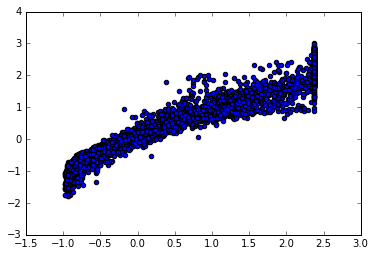

In [81]:
plt.scatter(y_test_scaled['price'], y_pred)

In [82]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [83]:
i=0
for column in X.columns:
    if i < 20:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 114.44992310656002
depth ---> 1094.3619503146838
table ---> 870.7621305823602
x ---> 11736.120985774996
y ---> 11226.90174676179
z ---> 2009.7032468058987
cut_Good ---> 13.231803761742057
cut_Ideal ---> 17.302431075466064
cut_Premium ---> 10.593425134873666
color_F ---> 1.5920821393710074
color_G ---> 1.7538430512458176
color_H ---> 1.562010606859445
color_I ---> 1.425196183136435
color_J ---> 1.2514511912532473
clarity_IF ---> 3.6227215655844844
clarity_SI1 ---> 19.553885912807978
clarity_SI2 ---> 13.730891072218972
clarity_VS1 ---> 29.93614796480108
clarity_VVS1 ---> 6.370849592769357
clarity_VVS2 ---> 8.298889360184303


In [84]:
data=pd.read_csv('Holiday_Package.csv')

In [85]:
data.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [86]:
data.drop(labels='Unnamed: 0',axis=1,inplace=True)
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [87]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [89]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(872, 7)


In [90]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [91]:
data.describe(include="all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [92]:
data.groupby(["Holliday_Package"]).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


In [93]:
data["Holliday_Package"].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

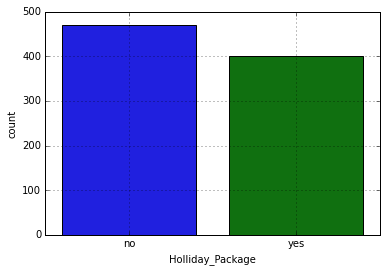

In [94]:
sns.countplot(data['Holliday_Package'])
plt.grid()
plt.show()

Shape before Outliers Treatment (872, 7)


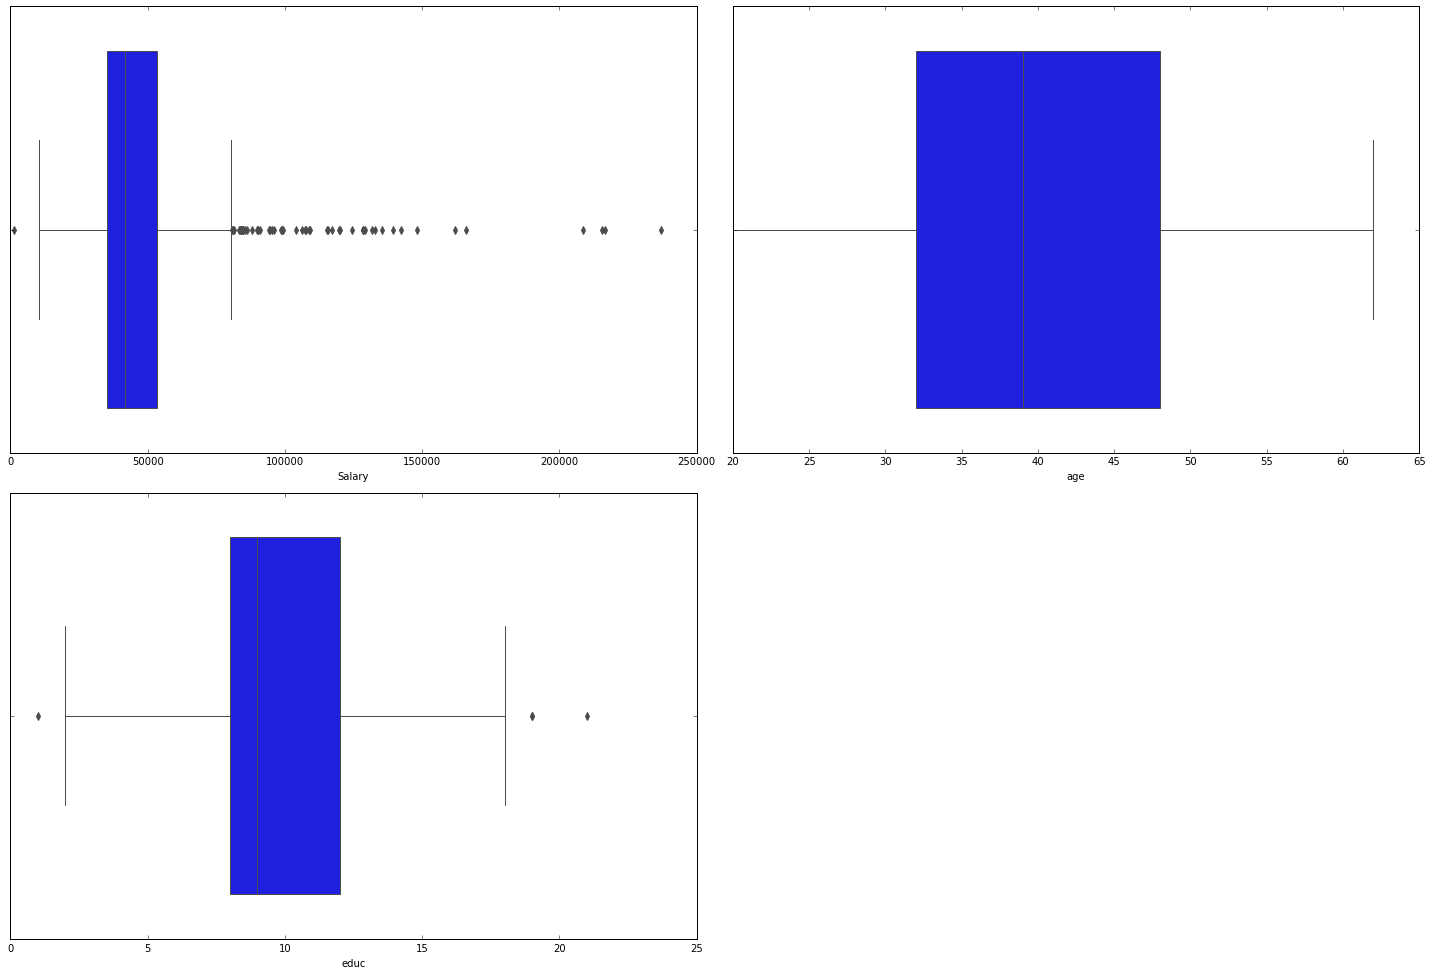

In [95]:
#cols = ['Salary','age','educ']
#for i in cols:
#    sns.boxplot(data[i],whis=1.5)
#    plt.grid()
#    plt.show();
data_plot=data[['Salary', 'age', 'educ']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',data.shape)

In [96]:
#def remove_outlier(col):
#    sorted(col)
#    Q1,Q3=np.percentile(col,[25,75])
#    IQR=Q3-Q1
#    lower_range= Q1-(1.5 * IQR)
#    upper_range= Q3+(1.5 * IQR)
#    return lower_range, upper_range

In [97]:
#for column in data.columns:
#    if data[column].dtype != 'object': 
#            lr,ur=remove_outlier(data[column])
#            data[column]=np.where(data[column]>ur,ur,data[column])
#            data[column]=np.where(data[column]<lr,lr,data[column])

In [98]:
#cols = ['Salary','age','educ']
#for i in cols:
#    sns.boxplot(data[i],whis=1.5)
#    plt.grid()
#    plt.show();

In [99]:
data.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


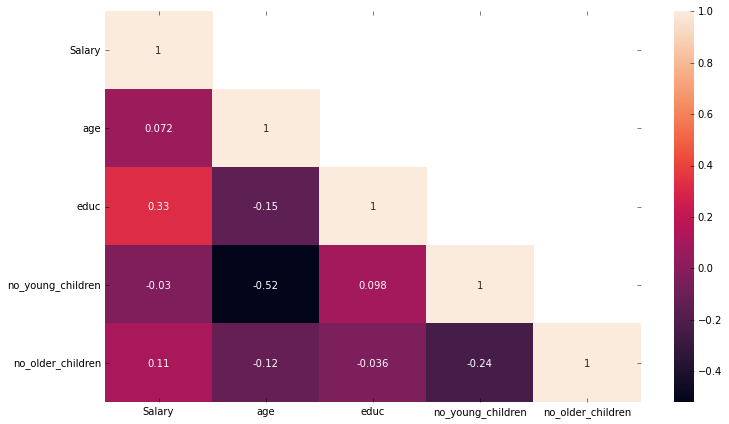

In [100]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

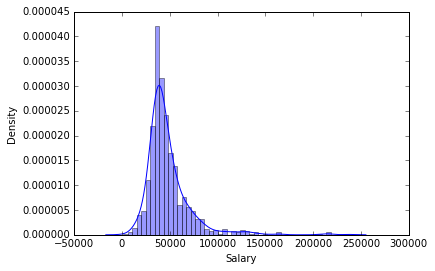

In [101]:
sns.distplot(data['Salary'])
plt.show()

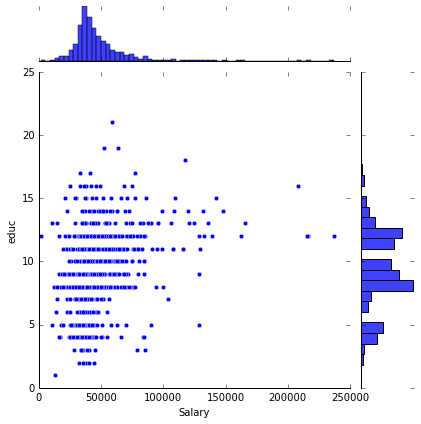

In [102]:
sns.jointplot(data['Salary'], data['educ']);

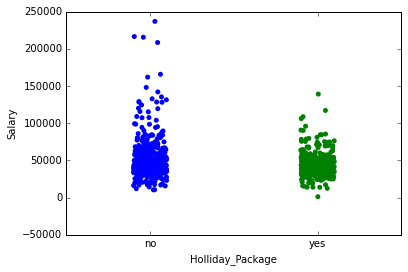

In [103]:
sns.stripplot(data['Holliday_Package'], data['Salary']);

In [104]:
count_no_sub = len(data[data['Holliday_Package']=='no'])
count_sub = len(data[data['Holliday_Package']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Default", pct_of_sub*100)

percentage of no Default is 54.01376146788991
percentage of Default 45.98623853211009


Text(0, 0.5, 'Holiday Package')

<Figure size 1080x1080 with 0 Axes>

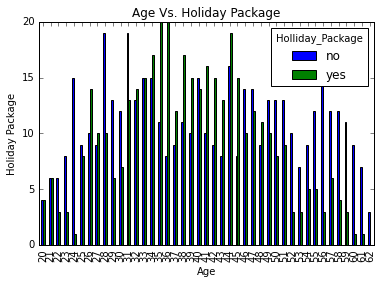

In [105]:
plt.figure(figsize=(15,15))
pd.crosstab(data.age,data['Holliday_Package']).plot(kind='bar')
plt.title('Age Vs. Holiday Package')
plt.xlabel('Age')
plt.ylabel('Holiday Package')

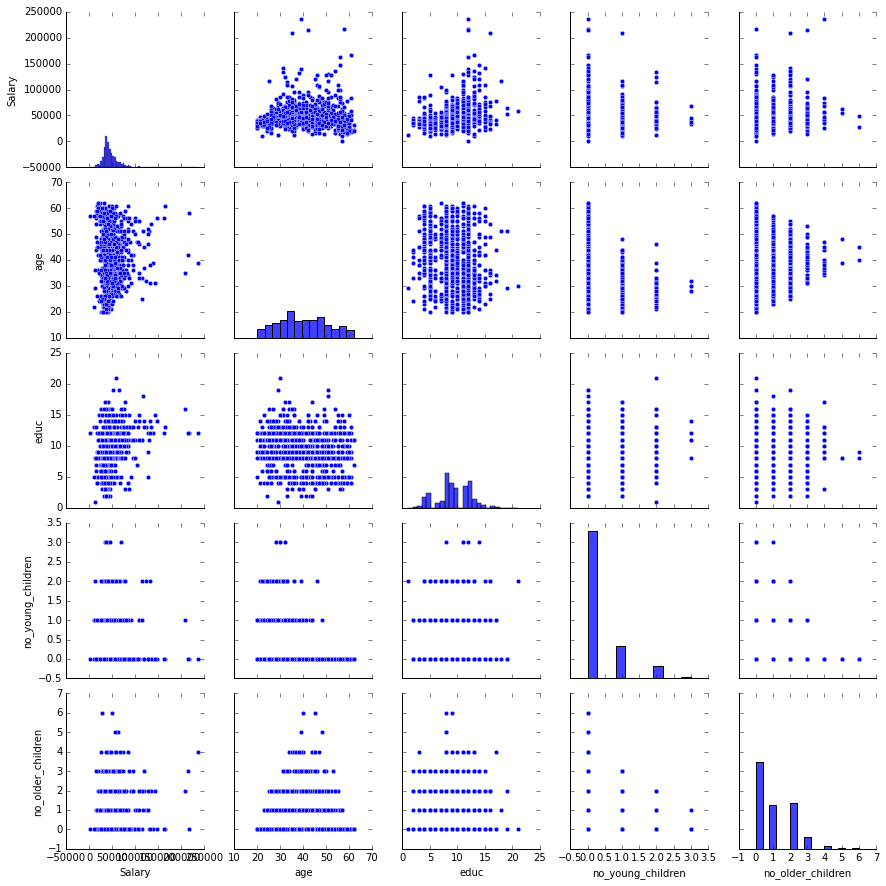

In [106]:
sns.pairplot(data)
plt.show()

In [107]:
print ('The percentage of zeroes in the Target variable is',(data['Holliday_Package'].value_counts(1)[0])*100,
        'and the percentage of ones in the Target variable is',round((data['Holliday_Package'].value_counts(1)[1])*100,5))

The percentage of zeroes in the Target variable is 54.01376146788991 and the percentage of ones in the Target variable is 45.98624


In [108]:
data[data.applymap(np.isreal).all(1)]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [109]:
data.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


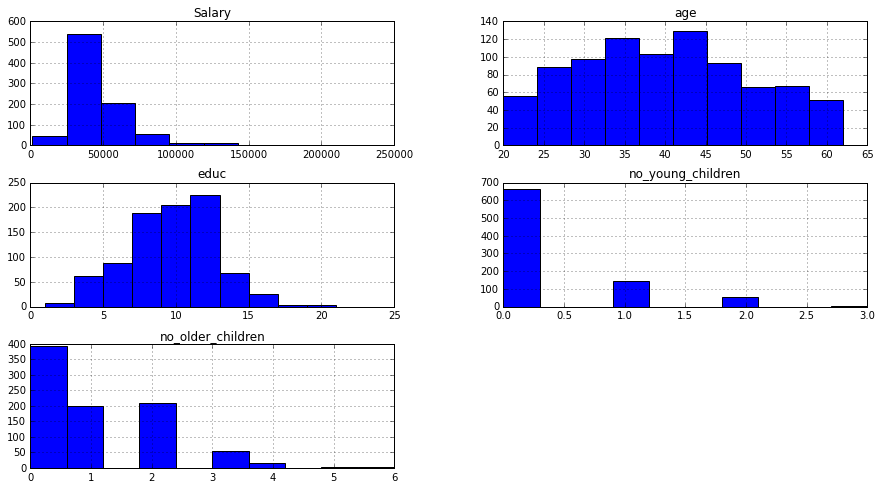

In [110]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
data[['Salary','age','educ','no_young_children','no_older_children']].hist();

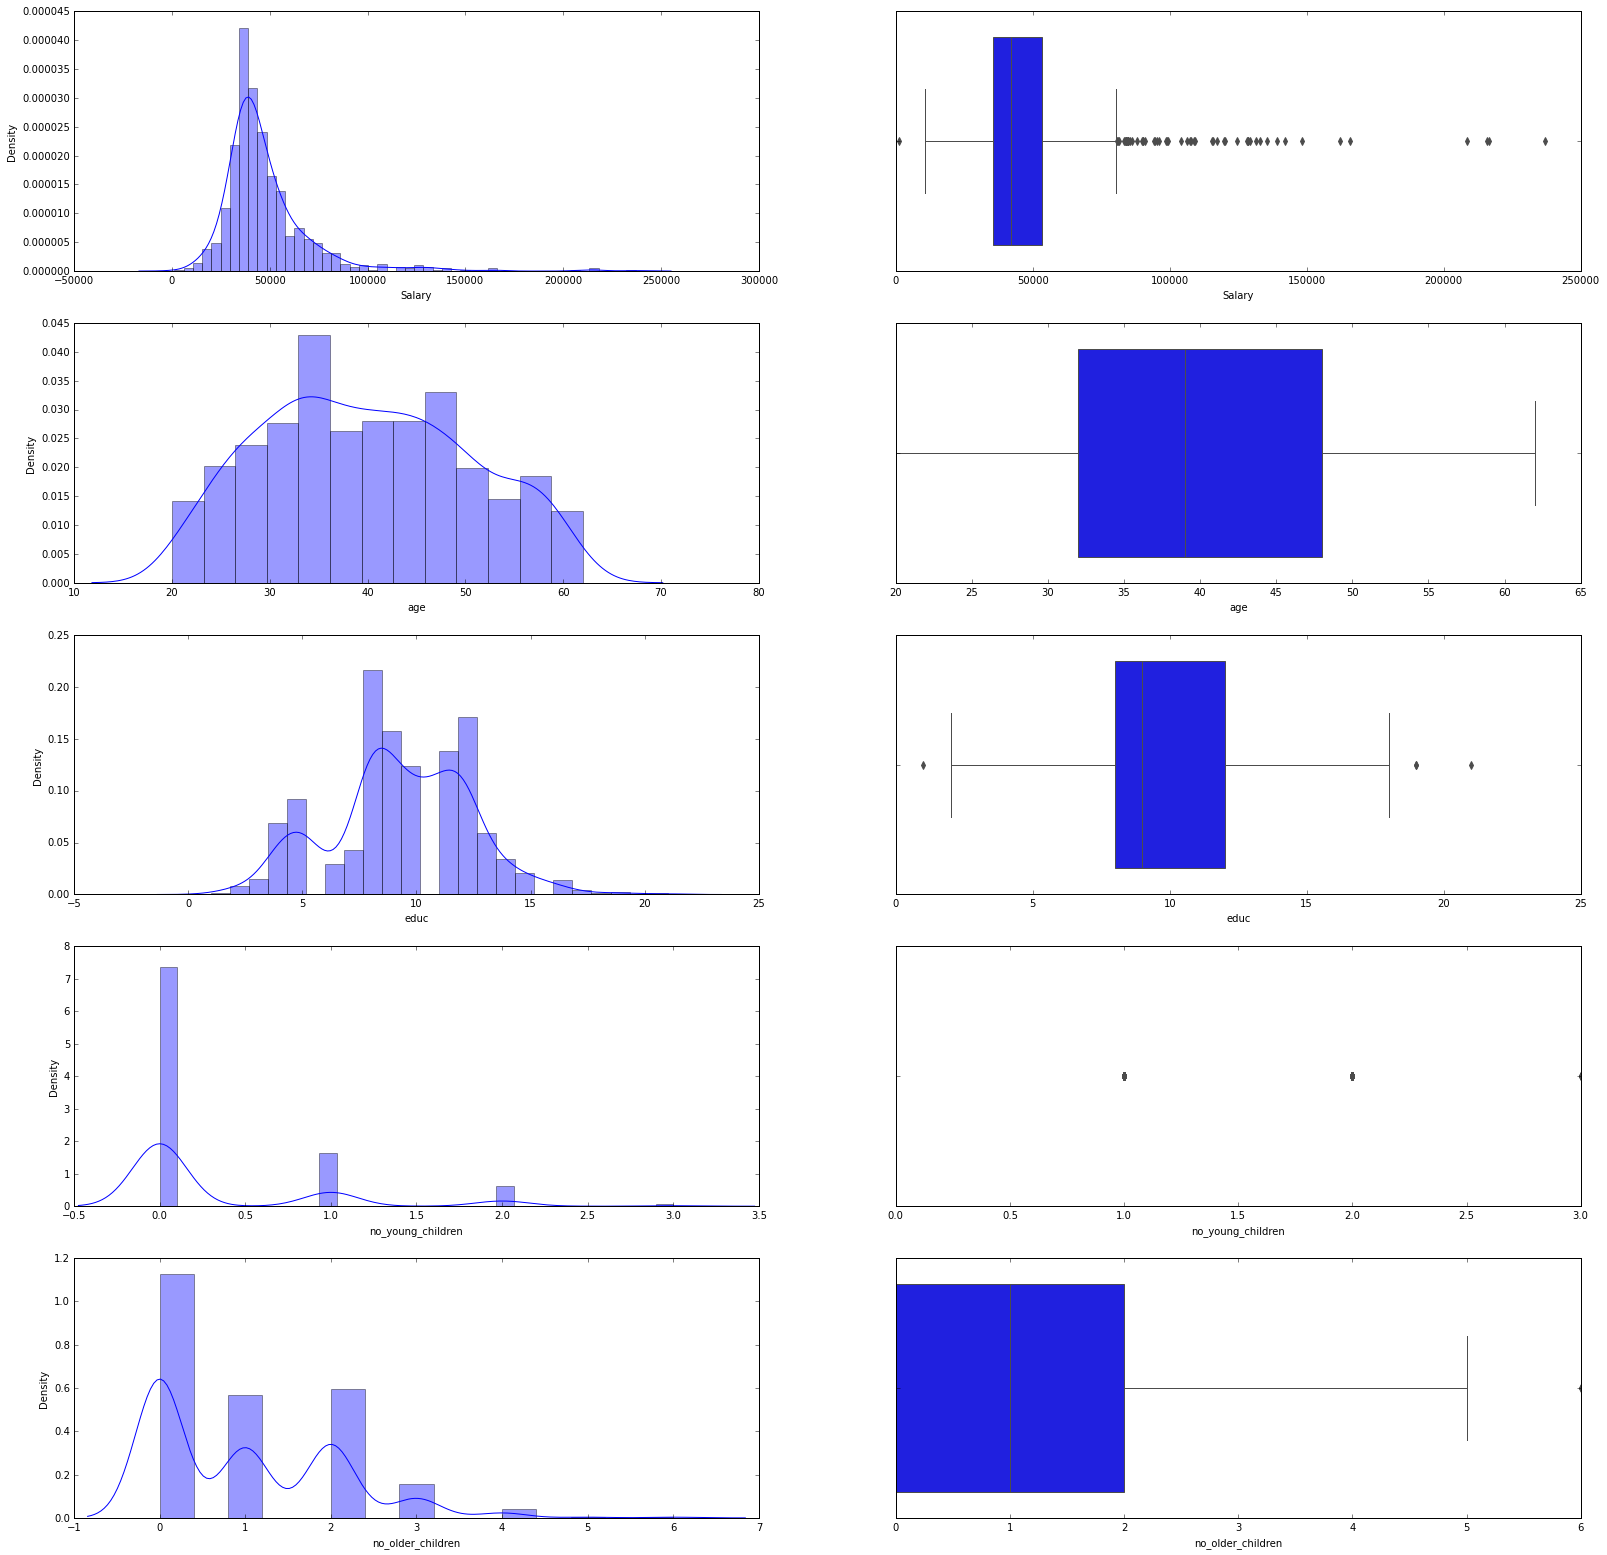

In [111]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(27,27)
sns.distplot(data['Salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Salary', data=data, ax=axes[0][1])
sns.distplot(data['age'] , kde=True, ax=axes[1][0])
sns.boxplot(x='age', data=data, ax=axes[1][1])
sns.distplot(data['educ'], kde=True, ax=axes[2][0])
sns.boxplot(x='educ', data=data, ax=axes[2][1])
a=sns.distplot(data['no_young_children'] , kde=True, ax=axes[3][0])
sns.boxplot(x='no_young_children', data=data , ax=axes[3][1])
sns.distplot(data['no_older_children'] , kde=True, ax=axes[4][0])
sns.boxplot(x='no_older_children', data=data , ax=axes[4][1])
plt.show()

In [112]:
data.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

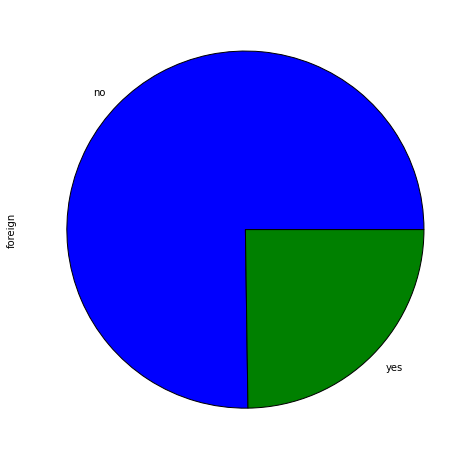

In [113]:
pd.value_counts(data['foreign']).plot(kind="pie")
plt.show()

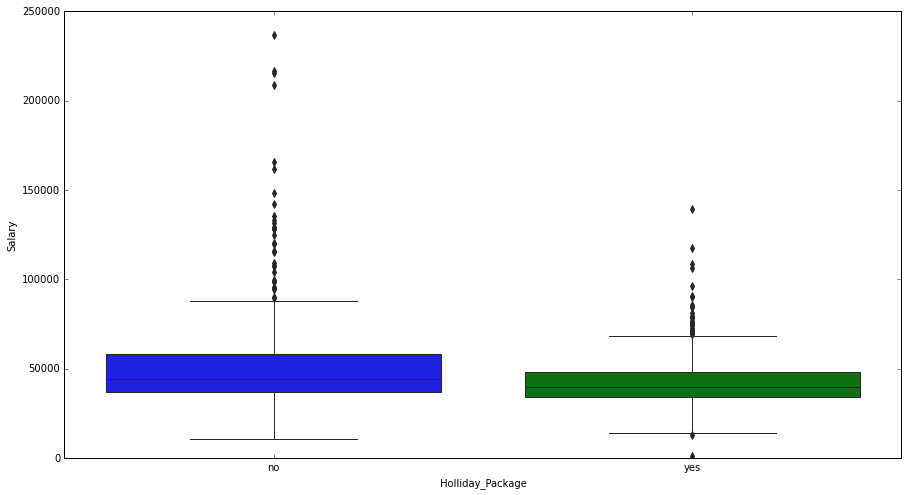

In [114]:
sns.boxplot(data['Holliday_Package'],data['Salary']);

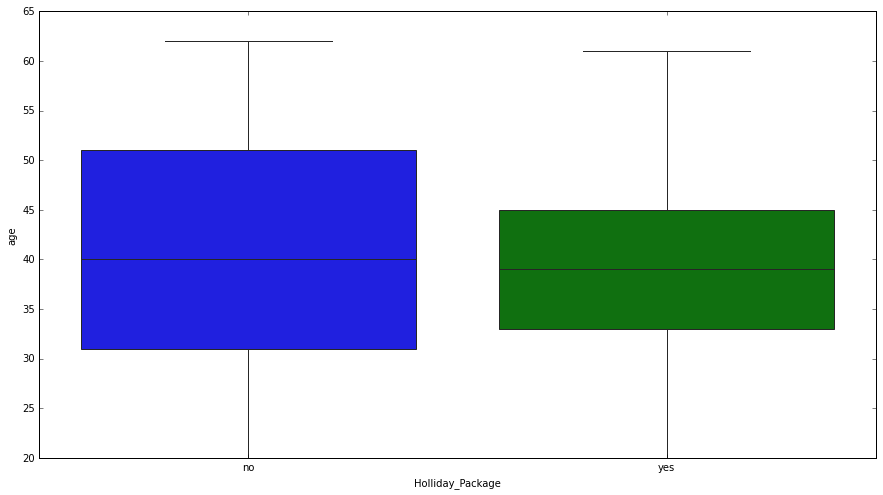

In [115]:
sns.boxplot(data['Holliday_Package'],data['age']);

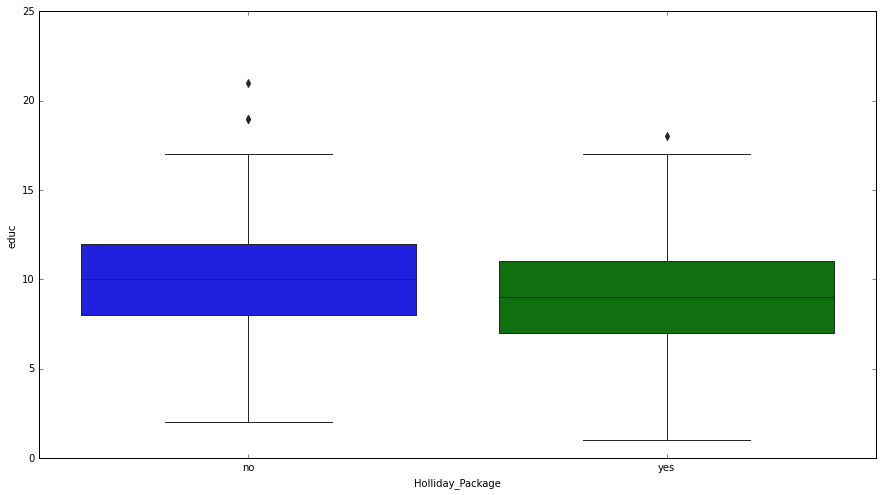

In [116]:
sns.boxplot(data['Holliday_Package'],data['educ']);

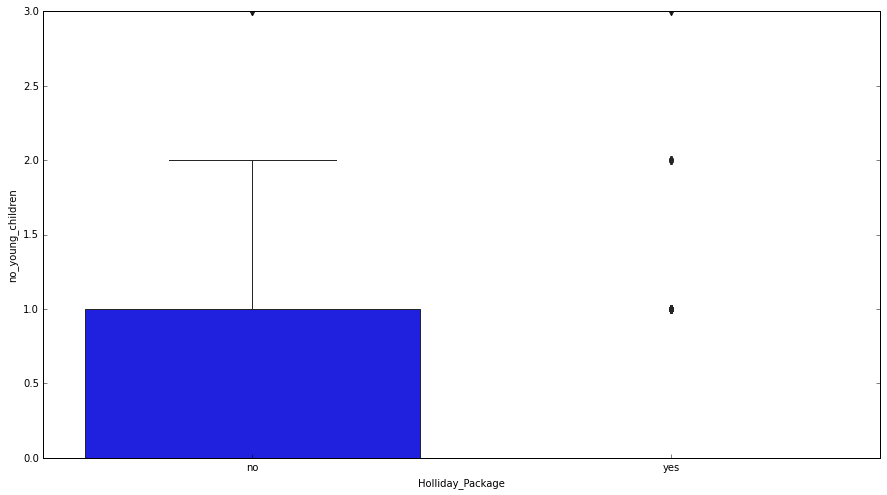

In [117]:
sns.boxplot(data['Holliday_Package'],data['no_young_children']);

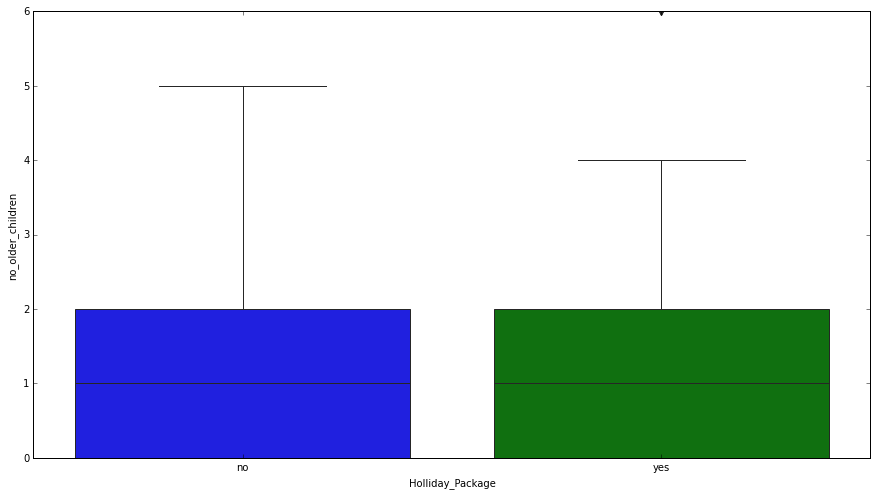

In [118]:
sns.boxplot(data['Holliday_Package'],data['no_older_children']);

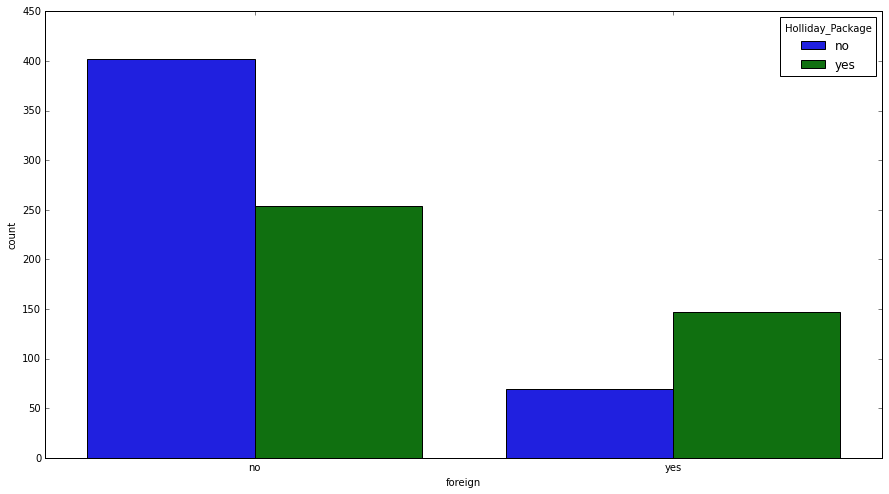

In [119]:
sns.countplot(data['foreign'],hue=data['Holliday_Package']);

In [120]:
data_dummy = pd.get_dummies(data,drop_first=True)
data_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [121]:
X = data_dummy.drop('Holliday_Package_yes', axis=1)
y = data_dummy['Holliday_Package_yes']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=data_dummy['Holliday_Package_yes'])

In [123]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [124]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   25.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [126]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [127]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


In [128]:
model.score(X_train, y_train)

0.6672131147540984

In [129]:
model.score(X_test, y_test)

0.6526717557251909

AUC: 0.735


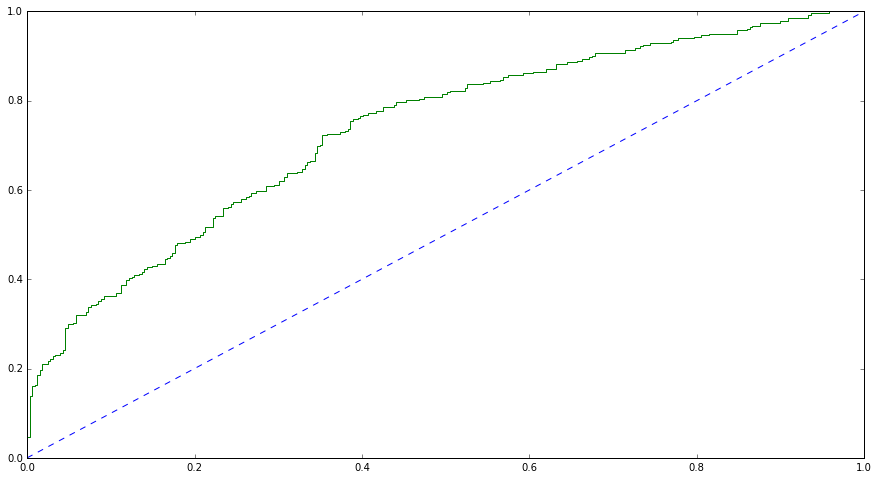

In [130]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.735


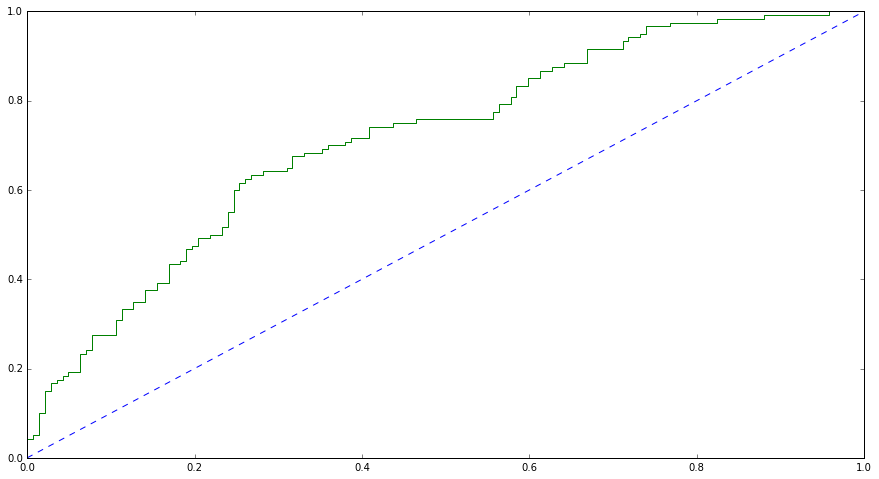

In [131]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [132]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

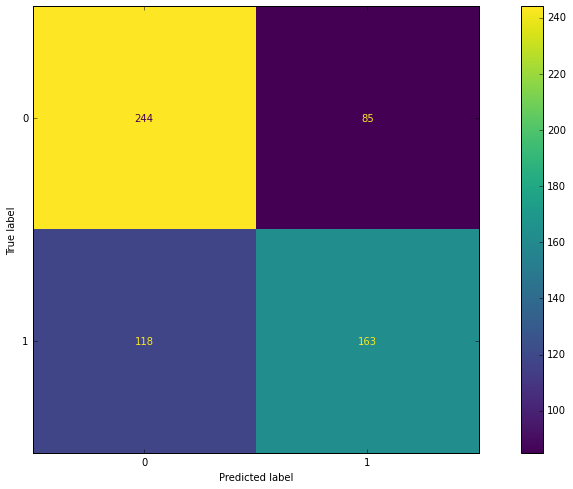

In [133]:
plot_confusion_matrix(model,X_train,y_train);

In [134]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [135]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

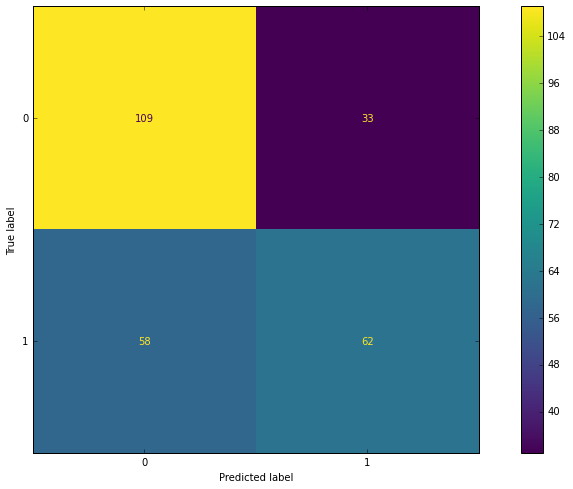

In [136]:
plot_confusion_matrix(model,X_test,y_test);

In [137]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [139]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

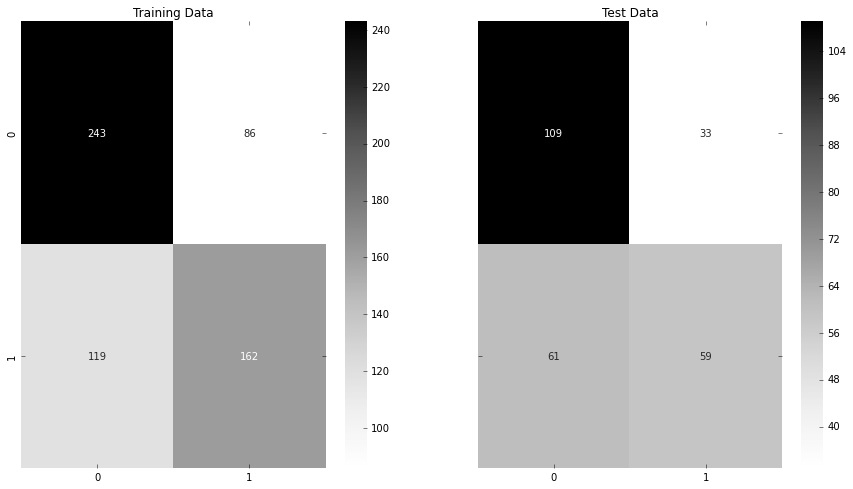

In [140]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [141]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [142]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [143]:
pred_prob_train[:,1]

array([0.7381512 , 0.28961707, 0.38234291, 0.76483486, 0.46682945,
       0.44346246, 0.37680169, 0.30948321, 0.61081614, 0.64208316,
       0.25213217, 0.26469615, 0.39923017, 0.04631524, 0.23022974,
       0.36249565, 0.53701148, 0.33367574, 0.63047975, 0.62551868,
       0.62038047, 0.26045898, 0.8778445 , 0.33010529, 0.09907975,
       0.83197262, 0.20726445, 0.7448485 , 0.52475576, 0.18602064,
       0.34007289, 0.32707499, 0.37873484, 0.42874061, 0.31084381,
       0.28746402, 0.11553843, 0.53094637, 0.47040748, 0.22122639,
       0.26026817, 0.80975365, 0.51459465, 0.74029285, 0.79737631,
       0.40099878, 0.298335  , 0.93065406, 0.44451279, 0.70660174,
       0.75490574, 0.46875931, 0.77220783, 0.37565531, 0.22661608,
       0.74188557, 0.26237721, 0.5247693 , 0.6721239 , 0.34088095,
       0.62335813, 0.57741879, 0.54295979, 0.45085985, 0.56389786,
       0.5965561 , 0.12149134, 0.57410954, 0.3890238 , 0.26157228,
       0.35655665, 0.7429183 , 0.76617151, 0.22742495, 0.42898

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


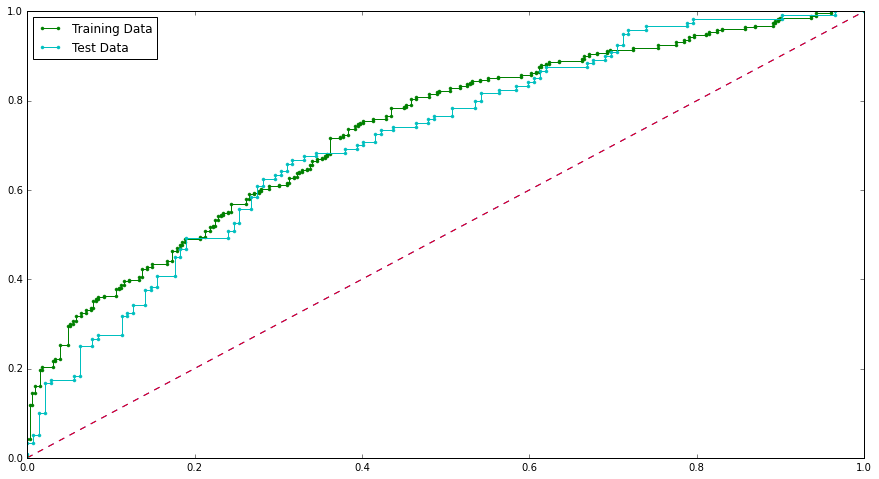

In [144]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [145]:
coef_scaled = pd.DataFrame(data = {'coef':np.ndarray.flatten(model.coef_)}, index = X_train.columns, columns=['coef'])

In [146]:
coef_scaled['coef'].abs().sort_values( ascending = False)

foreign_yes          1.320602
no_young_children    1.282791
educ                 0.058604
age                  0.057795
no_older_children    0.037567
Salary               0.000014
Name: coef, dtype: float64